# Библиотеки

In [1]:
from zlib import crc32

import numpy as np
import pandas as pd
import scipy.stats as st
import matplotlib.pylab as plt
%matplotlib inline
import seaborn as sns

# Код генерации выборки

In [2]:
import re
EMAIL_REGEX = re.compile(r"[^@]+@phystech.edu")

def generate_dataset(code):
    rs = np.random.RandomState(code)
    alpha = rs.uniform()*10
    data = rs.randn(100, 2)
    data[:,1] = data[:, 0]
    data[:,1] += rs.randn(100)*alpha
    data[-1,0] = 99999
    return data

# Генерация выборки для вашей почты

<span style="color:red">
    ВАЖНО!
    Почта, которую укажете ниже и почта с которой Вы отправляете домашнее задание должна совпадать!
    В момент проверки задания алгоритм генерирует выборку на основе почты из анкеты!
</span>

Внимательно проверьте почту для которой выполняется задание!

In [3]:
task = dict()
task['mail'] = input(prompt='Enter your mail: ')
assert EMAIL_REGEX.match(task['mail']), 'Not a mail in the phystech.edu domain'
task['id'] = crc32(task['mail'].encode('utf-8'))
task['data'] = generate_dataset(task['id'])

task

Enter your mail: egorov.sa@phystech.edu


{'mail': 'egorov.sa@phystech.edu',
 'id': 1581189463,
 'data': array([[-1.78987904e-01, -9.88808361e-02],
        [-3.95224840e-01, -1.52876215e-01],
        [-1.46970619e-01, -4.05422459e-01],
        [-1.33522480e-01, -4.64450674e-01],
        [ 2.43262250e-02,  7.26373788e-02],
        [-1.09316453e+00, -1.23092134e+00],
        [-4.54109640e-01, -7.28832223e-01],
        [ 1.18487396e+00,  1.17942177e+00],
        [-2.78304764e-01, -1.16179202e+00],
        [ 1.11394584e+00,  1.25542441e+00],
        [ 1.03691392e+00,  9.34973663e-01],
        [-1.15315139e+00, -1.18992593e+00],
        [ 2.14567275e+00,  2.34582404e+00],
        [ 8.21901134e-01,  9.11524281e-01],
        [-1.38964151e+00, -1.31520713e+00],
        [-1.13475333e+00, -1.56368339e+00],
        [-7.85544962e-01, -1.15036177e-01],
        [-3.54055113e-01, -7.66237566e-01],
        [ 6.45599109e-01,  5.88177567e-01],
        [-3.35447444e-01,  9.39531403e-03],
        [-3.94755203e-01, -5.86287626e-01],
        [ 2.12

# Работа с выборкой

In [4]:
data = pd.DataFrame(task['data'])
data.describe()

,0,1
count,100.000000,100.000000
mean,1000.090601,0.078983
std,9999.889881,0.942573
min,-2.170034,-2.295828
25%,-0.515490,-0.617796
50%,0.082106,0.065481
75%,0.825979,0.860721
max,99999.000000,2.345824


In [5]:
text_size = 15
plt.rcParams['lines.linewidth'] = 3
plt.rcParams['lines.markersize'] = 6
plt.rcParams['xtick.labelsize'] = text_size
plt.rcParams['ytick.labelsize'] = text_size
plt.rcParams['legend.fontsize'] = text_size
plt.rcParams['axes.titlesize'] = text_size
plt.rcParams['axes.labelsize'] = text_size
plt.rcParams['figure.figsize'] = (12.0, 8.0)
plt.rcParams['font.size'] = text_size

In [6]:
X = data.values
X = X.T

## t-критерий Стьюдента линейной зависимости

In [8]:
r, p_value = st.pearsonr(X[0], X[1])
print('Значение коэффициента корреляции Пирсона: {} '.format(round(r, 3)))
print('p-value = {}'.format( round(p_value, 3) ))

Значение коэффициента корреляции Пирсона: -0.083 
p-value = 0.414


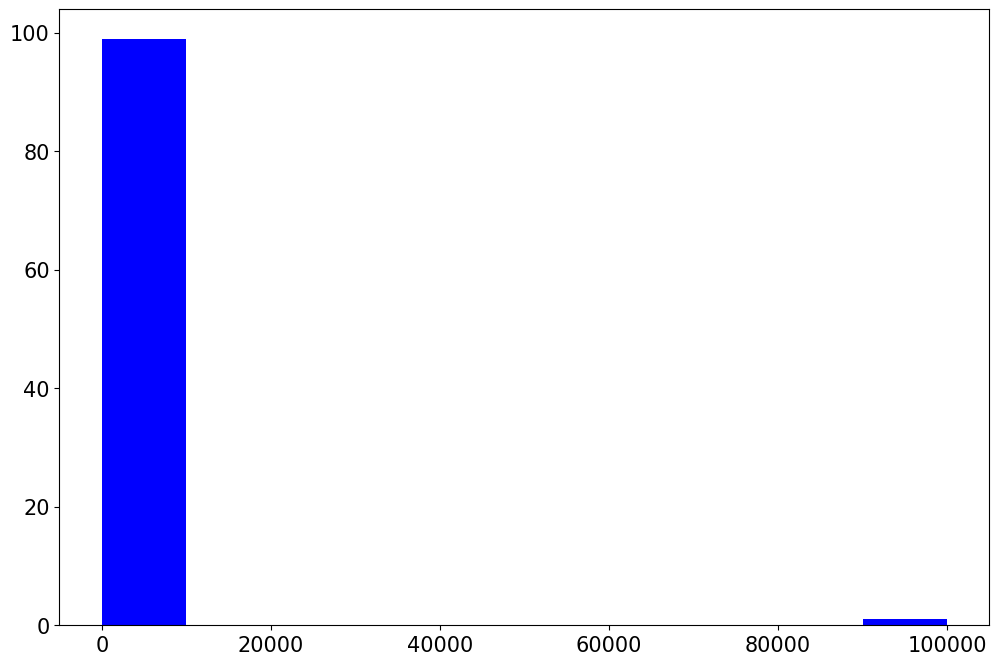

In [9]:
plt.hist(X[0], color = 'blue')
plt.show()

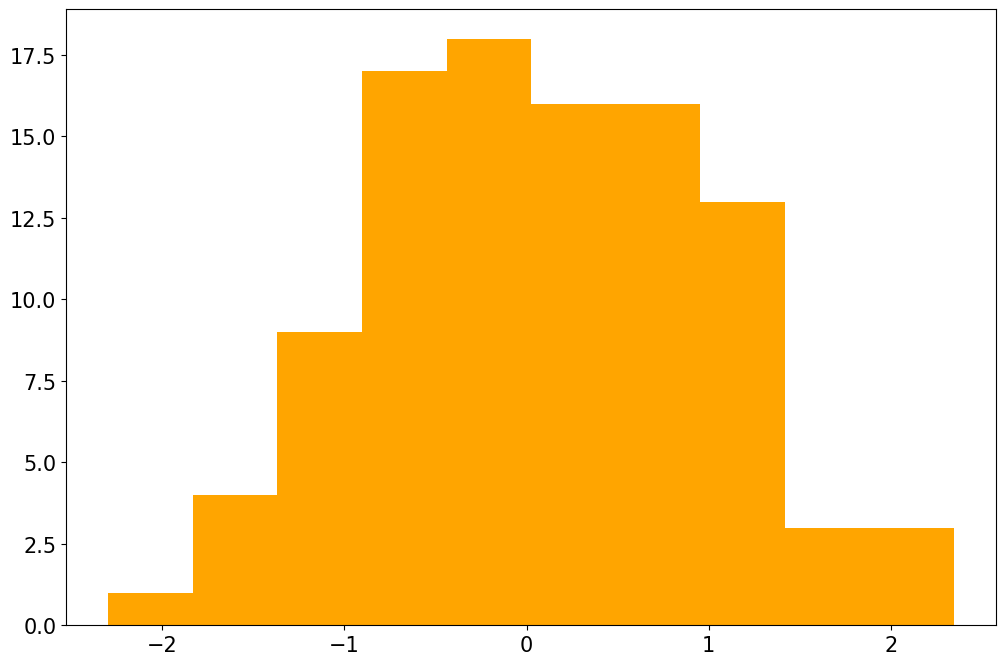

In [10]:
plt.hist(X[1], color = 'orange')
plt.show()

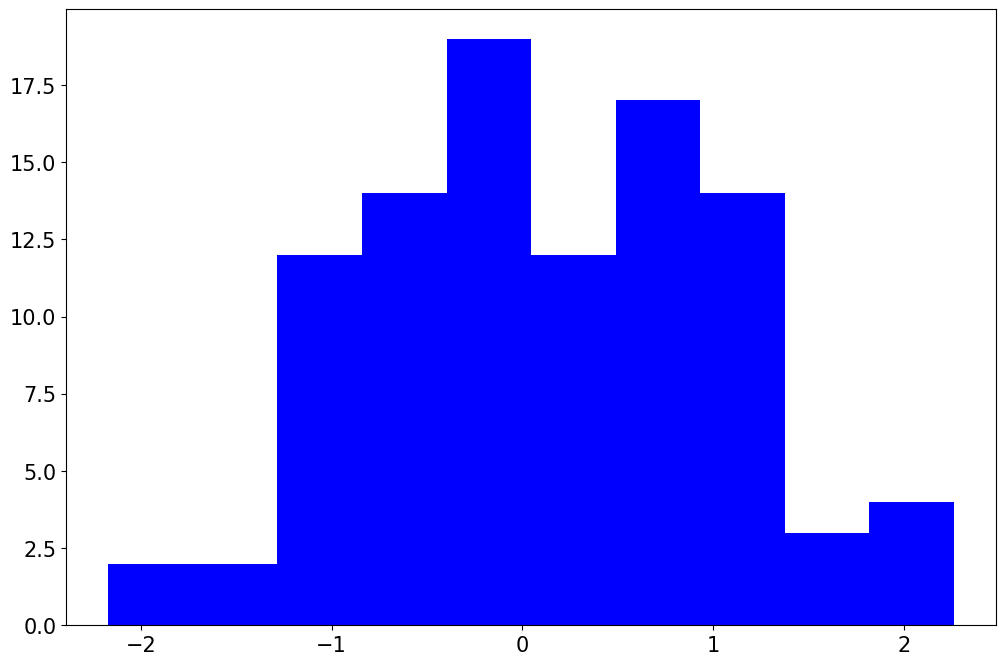

In [11]:
X_0 = X[0][X[0] != X[0].max()]
plt.hist(X_0, color = 'blue')
plt.show()

In [12]:
X_1 = X[1][X[1] != X[1].max()]

In [13]:
r, p_value = st.pearsonr(X_0, X_1)
print('Значение коэффициента корреляции Пирсона: {} '.format(round(r, 3)))
print('p-value = {}'.format( round(p_value, 3) ))

Значение коэффициента корреляции Пирсона: 0.222 
p-value = 0.027


### Коэффициент корреляции Кендалла

In [14]:
tau, p_value = st.kendalltau(X[0], X[1])
print('Значение коэффициента корреляции Пирсона: {} '.format(round(tau, 2)))
print('p-value = {}'.format( round(p_value, 2) ))

Значение коэффициента корреляции Пирсона: 0.78 
p-value = 0.0
